In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils.utils import predict
import matplotlib.pyplot as plt

In [2]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [3]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0)
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [4]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('uint8')
rdkit.columns = rdkit.columns.astype(str)

In [5]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [6]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [7]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [8]:
sku = pd.concat([df_agg, df_agg_train])

In [9]:
sp = 'Trigonostemon reidioides'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [10]:
data_3

,molecule,species
0,CC(C)(OC1OC(CO)C(O)C(O)C1O)C1CCC(CO)=CC1O,Trigonostemon reidioides
1,CC1CC2CC(=O)C3CC(O)CN4C=CCC23C4(O)C1,Trigonostemon reidioides
2,CC1C(=O)CC2CC3=C(C(O)C(C)(C)C3=O)C21C,Trigonostemon reidioides
3,CC=C(C)C(=O)OC1CC2C(CC=C3CC(OC4CC(OC)C(OC5CC(O...,Trigonostemon reidioides
4,C=C(C)c1cc2ccc(O)cc2o1,Trigonostemon reidioides
...,...,...
147728,CC(=O)OC1CC2(O)C(OC(=O)c3ccccc3)C3C4(OC(C)=O)C...,Trigonostemon reidioides
147729,NCCCNCCCN1CCCCC=CCC=CCCCCC1,Trigonostemon reidioides
147730,COc1cccc2c1[nH]c1c(CCO)ncc(OC)c12,Trigonostemon reidioides
147731,CC(=O)OC1C(=O)C=CC(=O)C23C(=O)NC(Cc4ccccc4)C2C...,Trigonostemon reidioides


In [11]:
out_3 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_3,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
145/145 [==============================] - 22s 154ms/step
Predict both : running species to molecules prediction...


(array([3.9520e+04, 1.2644e+04, 6.9140e+03, 4.7490e+03, 3.8050e+03,
        3.1480e+03, 2.6860e+03, 2.4120e+03, 2.0840e+03, 1.8750e+03,
        1.7420e+03, 1.6460e+03, 1.5960e+03, 1.4520e+03, 1.3330e+03,
        1.2290e+03, 1.2470e+03, 1.2120e+03, 1.0790e+03, 1.0660e+03,
        1.0210e+03, 9.8900e+02, 9.5100e+02, 9.2600e+02, 8.8700e+02,
        8.8000e+02, 8.6500e+02, 8.1900e+02, 7.9600e+02, 8.1200e+02,
        7.9300e+02, 8.2800e+02, 7.4600e+02, 7.2700e+02, 7.0600e+02,
        6.8000e+02, 7.0800e+02, 6.6600e+02, 6.2700e+02, 6.1500e+02,
        6.2300e+02, 5.9800e+02, 6.0800e+02, 5.9200e+02, 5.9800e+02,
        5.7000e+02, 5.8400e+02, 5.8600e+02, 5.6700e+02, 5.5300e+02,
        5.2400e+02, 5.0300e+02, 5.0700e+02, 5.1100e+02, 5.4500e+02,
        4.7600e+02, 5.1100e+02, 5.3800e+02, 4.9800e+02, 4.4500e+02,
        4.9800e+02, 4.6900e+02, 4.4000e+02, 4.4100e+02, 4.4600e+02,
        4.4500e+02, 4.2600e+02, 4.3600e+02, 4.3000e+02, 4.2700e+02,
        4.4700e+02, 4.0400e+02, 4.0700e+02, 4.08

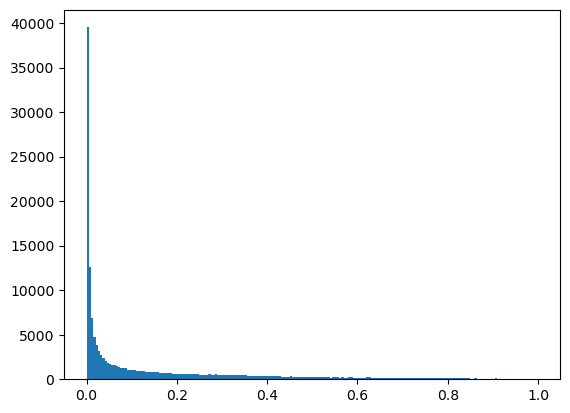

In [12]:
plt.hist(out_3.prob, bins=200)

In [13]:
out_3[out_3.prob>0.95]

,molecule,species,model,prob
606,CCCCOC(=O)c1c(O)c(Cl)c(C)c(Cl)c1Oc1c(OC)cc(O)c...,Trigonostemon reidioides,both_known,0.971715
1864,CC1=C(O)C(=O)C=C2C1=CC=C1C2(C)CCC2(C)C3CC(C)(O...,Trigonostemon reidioides,both_known,0.988251
1898,COC(=O)C1(C)CCC2(C)CC(O)C3(C)C4=CC=C5C(=CC(=O)...,Trigonostemon reidioides,both_known,0.951397
2380,C=C(C)C1CCC2(C(=O)O)CCC3(C)C(CCC4C5(C)CCC(=O)C...,Trigonostemon reidioides,both_known,0.980567
2649,COC(=O)C1(C)CCC2(C)CCC3(C)C4=CC(=O)c5c(cc(O)c(...,Trigonostemon reidioides,both_known,0.966977
...,...,...,...,...
146536,COc1c2c(cc(O)c1C(C)C)C1(C)CCC(=O)C(C)(C)C1CC2,Trigonostemon reidioides,both_known,0.957102
146779,CC1CCC2(CO)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C)C5C...,Trigonostemon reidioides,both_known,0.953846
146950,CC1=C2C3=CC=C4C(=CC(=O)C(O)=C4C)C3(C)CCC2(C)C2...,Trigonostemon reidioides,both_known,0.984169
147343,CC(=O)OC1CCC2(C)C(CCC3(C)C2CC=C2C4CC(C)(C)CCC4...,Trigonostemon reidioides,both_known,0.959296


# Test 4: let's see if cholesterol is present "everywhere"


In [14]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [15]:
out_4 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_4,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869484

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating mol to species flow...
Predicting mol to species...
36/36 [==============================] - 7s 185ms/step


(array([2144.,  998.,  833.,  679.,  596.,  478.,  452.,  406.,  373.,
         325.,  334.,  288.,  293.,  271.,  263.,  264.,  251.,  236.,
         220.,  252.,  237.,  216.,  203.,  226.,  197.,  186.,  200.,
         171.,  185.,  179.,  178.,  158.,  149.,  159.,  162.,  161.,
         162.,  174.,  159.,  155.,  137.,  160.,  146.,  161.,  153.,
         141.,  142.,  135.,  134.,  141.,  114.,  136.,  133.,  134.,
         146.,  135.,  148.,  128.,  135.,  108.,  116.,  137.,  125.,
         127.,  123.,  146.,  134.,  142.,  116.,  127.,  171.,  134.,
         126.,  125.,  118.,  145.,  142.,  146.,  120.,  135.,  139.,
         138.,  137.,  133.,  105.,  166.,  125.,  114.,  132.,  133.,
         133.,  119.,  144.,  124.,  120.,  128.,  131.,  122.,  128.,
         142.,  139.,  127.,  124.,  131.,  114.,  140.,  154.,  131.,
         138.,  151.,  133.,  152.,  136.,  140.,  132.,  150.,  156.,
         130.,  159.,  140.,  139.,  141.,  154.,  143.,  163.,  146.,
      

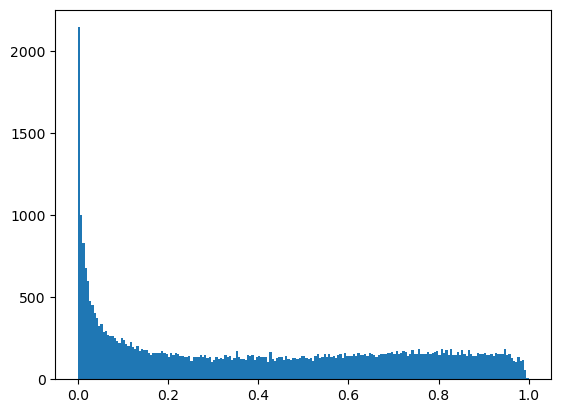

In [16]:
plt.hist(out_4.prob, bins=200)

In [17]:
out_4[out_4.prob>0.99]

,molecule,species,model,prob
291,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Sinularia leptoclados,m_to_s,0.992772
1167,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Eunicella cavolini,m_to_s,0.995253
1906,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Anthomastus bathyproctus,m_to_s,0.993909
2208,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Dasystenella acanthina,m_to_s,0.992201
2402,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Litophyton erectum,m_to_s,0.994712
...,...,...,...,...
31545,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Dendronephthya gigantea,m_to_s,0.993313
35122,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Lilium elegans,m_to_s,0.993160
35123,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Asteropsis carinifera,m_to_s,0.992273
35296,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Ganoderma neojaponicum,m_to_s,0.992575


# Test 5: test with a more rare molecule 

In [18]:
mol = 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [19]:
out_5 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_5,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 4s 118ms/step
Predict both : running species to molecules prediction...
36/

(array([2.7136e+04, 2.1460e+03, 1.0890e+03, 6.7200e+02, 4.3600e+02,
        3.6500e+02, 2.8200e+02, 2.6100e+02, 2.2200e+02, 2.1000e+02,
        1.7900e+02, 1.6600e+02, 1.3000e+02, 1.2200e+02, 1.1200e+02,
        1.2800e+02, 9.5000e+01, 8.0000e+01, 6.1000e+01, 6.7000e+01,
        6.1000e+01, 7.8000e+01, 5.5000e+01, 5.4000e+01, 5.1000e+01,
        6.0000e+01, 4.6000e+01, 4.9000e+01, 3.8000e+01, 3.6000e+01,
        4.7000e+01, 4.2000e+01, 4.4000e+01, 3.8000e+01, 2.8000e+01,
        3.5000e+01, 3.0000e+01, 3.7000e+01, 3.6000e+01, 2.2000e+01,
        3.5000e+01, 3.1000e+01, 2.7000e+01, 3.0000e+01, 3.2000e+01,
        1.8000e+01, 2.4000e+01, 2.4000e+01, 2.6000e+01, 2.2000e+01,
        2.1000e+01, 2.0000e+01, 1.0000e+01, 2.3000e+01, 1.6000e+01,
        2.5000e+01, 1.3000e+01, 1.4000e+01, 1.0000e+01, 1.3000e+01,
        1.4000e+01, 1.5000e+01, 1.6000e+01, 8.0000e+00, 1.4000e+01,
        2.0000e+01, 1.1000e+01, 1.6000e+01, 1.6000e+01, 6.0000e+00,
        1.1000e+01, 9.0000e+00, 6.0000e+00, 7.00

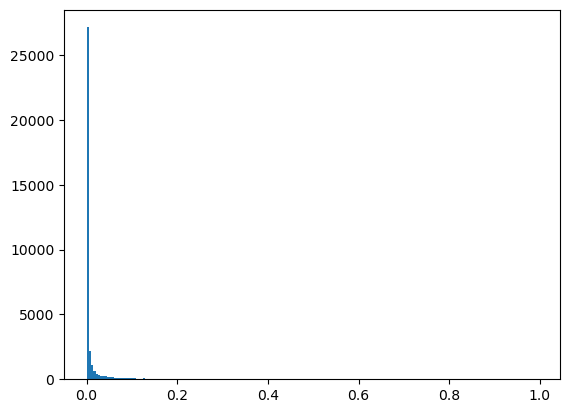

In [20]:
plt.hist(out_5.prob, bins=200)

In [21]:
out_5[out_5.prob>0.95]

,molecule,species,model,prob
55,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces ribosidificus,both_known,0.956525
295,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces tirandamycinicus,both_known,0.966615
595,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces rosa,both_known,0.965571
659,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces ascomycinicus,both_known,0.981480
808,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces olivaceus,both_known,0.967989
...,...,...,...,...
35382,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces lucensis,both_known,0.983230
35888,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces manipurensis,both_known,0.952638
35913,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces tendae,both_known,0.969352
36337,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces griseoflavus,both_known,0.982069


# Test adding just one edge to an unkown molecule to see the difference

In [9]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_6 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [10]:
g_lotus.add_node('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='molecule')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Mus musculus', label='present_in')
g_lotus.add_edge('Mus musculus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Dicranum japonicum', label='present_in')
g_lotus.add_edge( 'Dicranum japonicum', 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')

In [11]:
from utils.molecules import smiles_to_classyfire, smiles_to_fingerprint

In [12]:
chol_classy = smiles_to_classyfire(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])

In [13]:
chol_fp = smiles_to_fingerprint(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])
chol_fp.columns  = chol_fp.columns.astype(str)

In [14]:
out_6 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_6,
                pd.concat([molecule_features_dummy, chol_classy]),
                pd.concat([rdkit, chol_fp]),
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869488

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434744]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434744]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 142ms/step
Predict both : running species to molecules prediction...
36/

(array([ 75., 100., 104.,  92., 115., 146., 156., 165., 144., 153., 142.,
        158., 152., 165., 164., 176., 165., 156., 171., 153., 160., 153.,
        174., 146., 161., 147., 171., 182., 178., 153., 191., 161., 144.,
        167., 145., 146., 142., 155., 156., 131., 154., 165., 158., 153.,
        146., 124., 143., 128., 153., 131., 136., 121., 136., 143., 146.,
        122., 124., 155., 163., 145., 139., 134., 151., 125., 146., 151.,
        157., 158., 138., 164., 147., 159., 136., 162., 164., 159., 131.,
        163., 154., 152., 153., 142., 180., 179., 162., 185., 170., 187.,
        159., 150., 179., 149., 154., 158., 157., 163., 171., 199., 193.,
        162., 190., 174., 174., 166., 172., 183., 177., 212., 180., 185.,
        193., 182., 189., 173., 187., 196., 229., 219., 176., 197., 209.,
        184., 193., 188., 201., 212., 202., 200., 207., 196., 203., 202.,
        226., 213., 227., 198., 212., 208., 221., 205., 225., 215., 236.,
        218., 191., 226., 227., 242., 

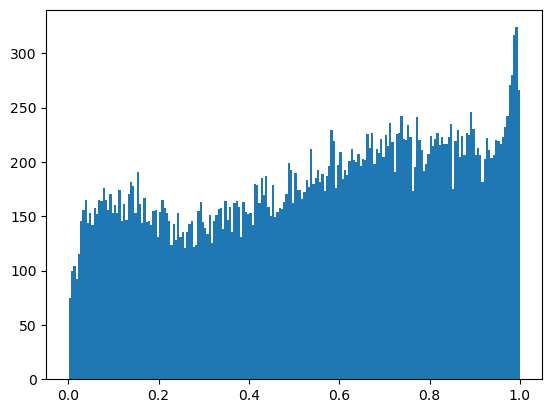

In [15]:
plt.hist(out_6.prob, bins=200)

In [16]:
out_6[out_6.prob>0.99]

,molecule,species,model,prob
23,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Pseudopotamilla occelata,both_known,0.990656
42,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Diadema setosum,both_known,0.997871
51,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Ganoderma applanatum,both_known,0.991712
87,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Russula cyanoxantha,both_known,0.991804
124,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Erythrobacter litoralis,both_known,0.993715
...,...,...,...,...
36130,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Polytrichum formosum,both_known,0.993152
36202,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Litophyton arboreum,both_known,0.991093
36370,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Chloroflexus aurantiacus,both_known,0.997201
36387,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Mycoplasma mycoides,both_known,0.996719
